In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [5]:
path='C:/py/'
ipl=pd.read_csv(path+'ipl_2022.csv')

In [6]:
ipl.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [7]:
ipl.shape

(633, 8)

In [8]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [9]:
ipl.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [11]:
ipl.drop('Unnamed: 0',axis=1, inplace=True)

In [12]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           633 non-null    object 
 1   Base Price       633 non-null    object 
 2   TYPE             633 non-null    object 
 3   COST IN ₹ (CR.)  237 non-null    float64
 4   Cost IN $ (000)  237 non-null    float64
 5   2021 Squad       199 non-null    object 
 6   Team             633 non-null    object 
dtypes: float64(2), object(5)
memory usage: 34.7+ KB


In [13]:
ipl.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [18]:
ipl[ipl['Cost IN $ (000)'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team


In [17]:
ipl['COST IN ₹ (CR.)']= ipl['COST IN ₹ (CR.)'].fillna(0)
ipl['Cost IN $ (000)']= ipl['Cost IN $ (000)'].fillna(0)

In [23]:
ipl[ipl['2021 Squad'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team


In [22]:
ipl['2021 Squad']=ipl['2021 Squad'].fillna('Not Participated')

In [24]:
ipl.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [25]:
teams=ipl[ipl['COST IN ₹ (CR.)']>0]['Team'].unique()

In [26]:
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [28]:
ipl['status']=ipl['Team'].replace(teams,'sold')

In [29]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold


In [31]:
ipl[ipl['Player'].duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold


In [32]:
ipl.shape[0]

633

In [35]:
types=ipl['TYPE'].value_counts()
types.reset_index()

,index,TYPE
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


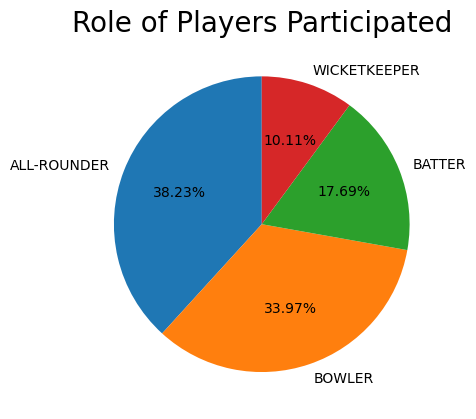

In [39]:
plt.pie(types.values,labels=types.index,autopct='%1.2f%%',startangle=90)
plt.title('Role of Players Participated',fontsize=20)
plt.show()

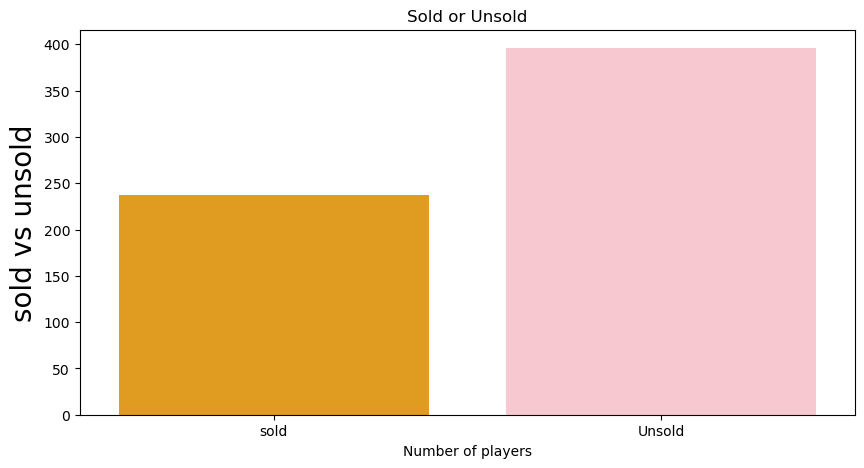

In [40]:
plt.figure(figsize=(10,5))
fig=sns.countplot(ipl['status'],palette=['Orange','Pink'])
plt.title('Sold or Unsold')
plt.xlabel('Number of players')
plt.ylabel('sold vs unsold',fontsize=20)
plt.show()


In [44]:
ipl.groupby('status')['Player'].count()

status
Unsold    396
sold      237
Name: Player, dtype: int64

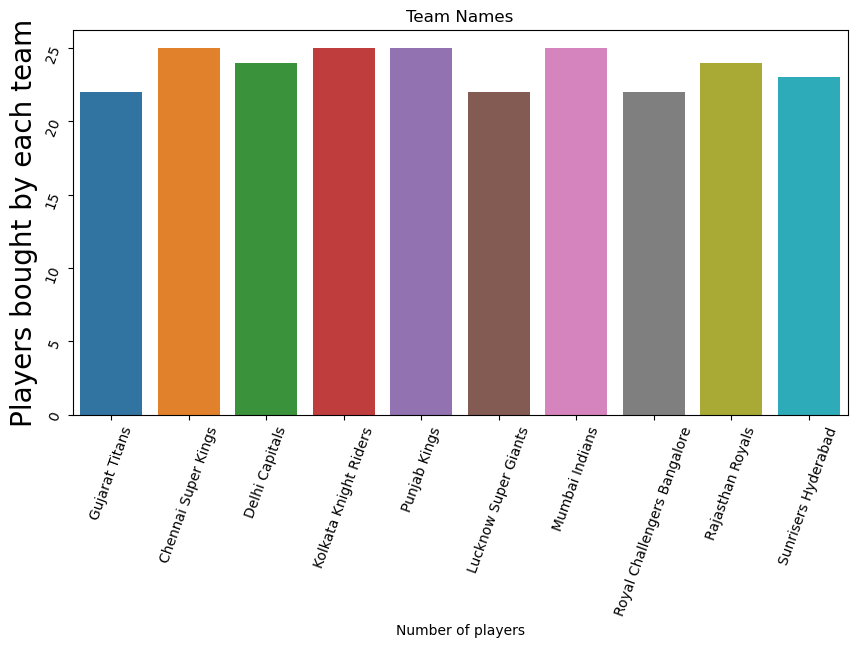

In [51]:
plt.figure(figsize=(10,5))
fig=sns.countplot(ipl[ipl['Team']!='Unsold']['Team'])
plt.title('Team Names')
plt.xlabel('Number of players')
plt.ylabel('Players bought by each team',fontsize=20)
plt.xticks(rotation=70)
plt.yticks(rotation=70)
plt.show()


In [57]:
ipl['Base Price'].unique()

array(['Draft Pick', '2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh', 'Retained', '1.5 Cr'], dtype=object)

In [52]:
ipl['retention']=ipl['Base Price']

In [58]:
ipl['retention'].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh', '1.5 Cr'],'From Auction',inplace=True)

In [60]:
ipl['retention'].values

array(['Draft Pick', 'Draft Pick', 'From Auction', 'From Auction',
       'Draft Pick', 'From Auction', 'From Auction', 'From Auction',
       'From Auction', 'From Auction', 'From Auction', 'From Auction',
       'From Auction', 'From Auction', 'From Auction', 'From Auction',
       'From Auction', 'From Auction', 'From Auction', 'From Auction',
       'From Auction', 'From Auction', 'Retained', 'From Auction',
       'Retained', 'Retained', 'From Auction', 'Retained', 'From Auction',
       'From Auction', 'From Auction', 'From Auction', 'From Auction',
       'From Auction', 'From Auction', 'From Auction', 'From Auction',
       'From Auction', 'From Auction', 'From Auction', 'From Auction',
       'From Auction', 'From Auction', 'From Auction', 'From Auction',
       'From Auction', 'From Auction', 'Retained', 'From Auction',
       'Retained', 'Retained', 'From Auction', 'Retained', 'From Auction',
       'From Auction', 'From Auction', 'From Auction', 'From Auction',
       'From

In [61]:
ipl

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,From Auction
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,From Auction
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick
...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction


In [62]:
ipl['base_price_unit']=ipl['Base Price'].apply(lambda x: str(x).split(' ')[-1])
ipl['base_price']=ipl['Base Price'].apply(lambda x: str(x).split(' ')[0])

In [63]:
ipl['base_price']

0      Draft
1      Draft
2          2
3         40
4      Draft
       ...  
628       20
629       20
630       20
631       20
632       20
Name: base_price, Length: 633, dtype: object

In [64]:
ipl['base_price_unit']

0      Pick
1      Pick
2        Cr
3      Lakh
4      Pick
       ... 
628    Lakh
629    Lakh
630    Lakh
631    Lakh
632    Lakh
Name: base_price_unit, Length: 633, dtype: object

In [65]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,Pick,Draft
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,Pick,Draft
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,From Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,From Auction,Lakh,40
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,Pick,Draft


In [66]:
ipl['base_price'].replace('Retained',0,inplace=True)

In [67]:
ipl.groupby(['Team','retention'])['retention'].count()[:-1]

Team                         retention   
Chennai Super Kings          From Auction    21
                             Retained         4
Delhi Capitals               From Auction    20
                             Retained         4
Gujarat Titans               Draft Pick       3
                             From Auction    19
Kolkata Knight Riders        From Auction    21
                             Retained         4
Lucknow Super Giants         Draft Pick       3
                             From Auction    19
Mumbai Indians               From Auction    21
                             Retained         4
Punjab Kings                 From Auction    23
                             Retained         2
Rajasthan Royals             From Auction    21
                             Retained         3
Royal Challengers Bangalore  From Auction    19
                             Retained         3
Sunrisers Hyderabad          From Auction    20
                             Retained         

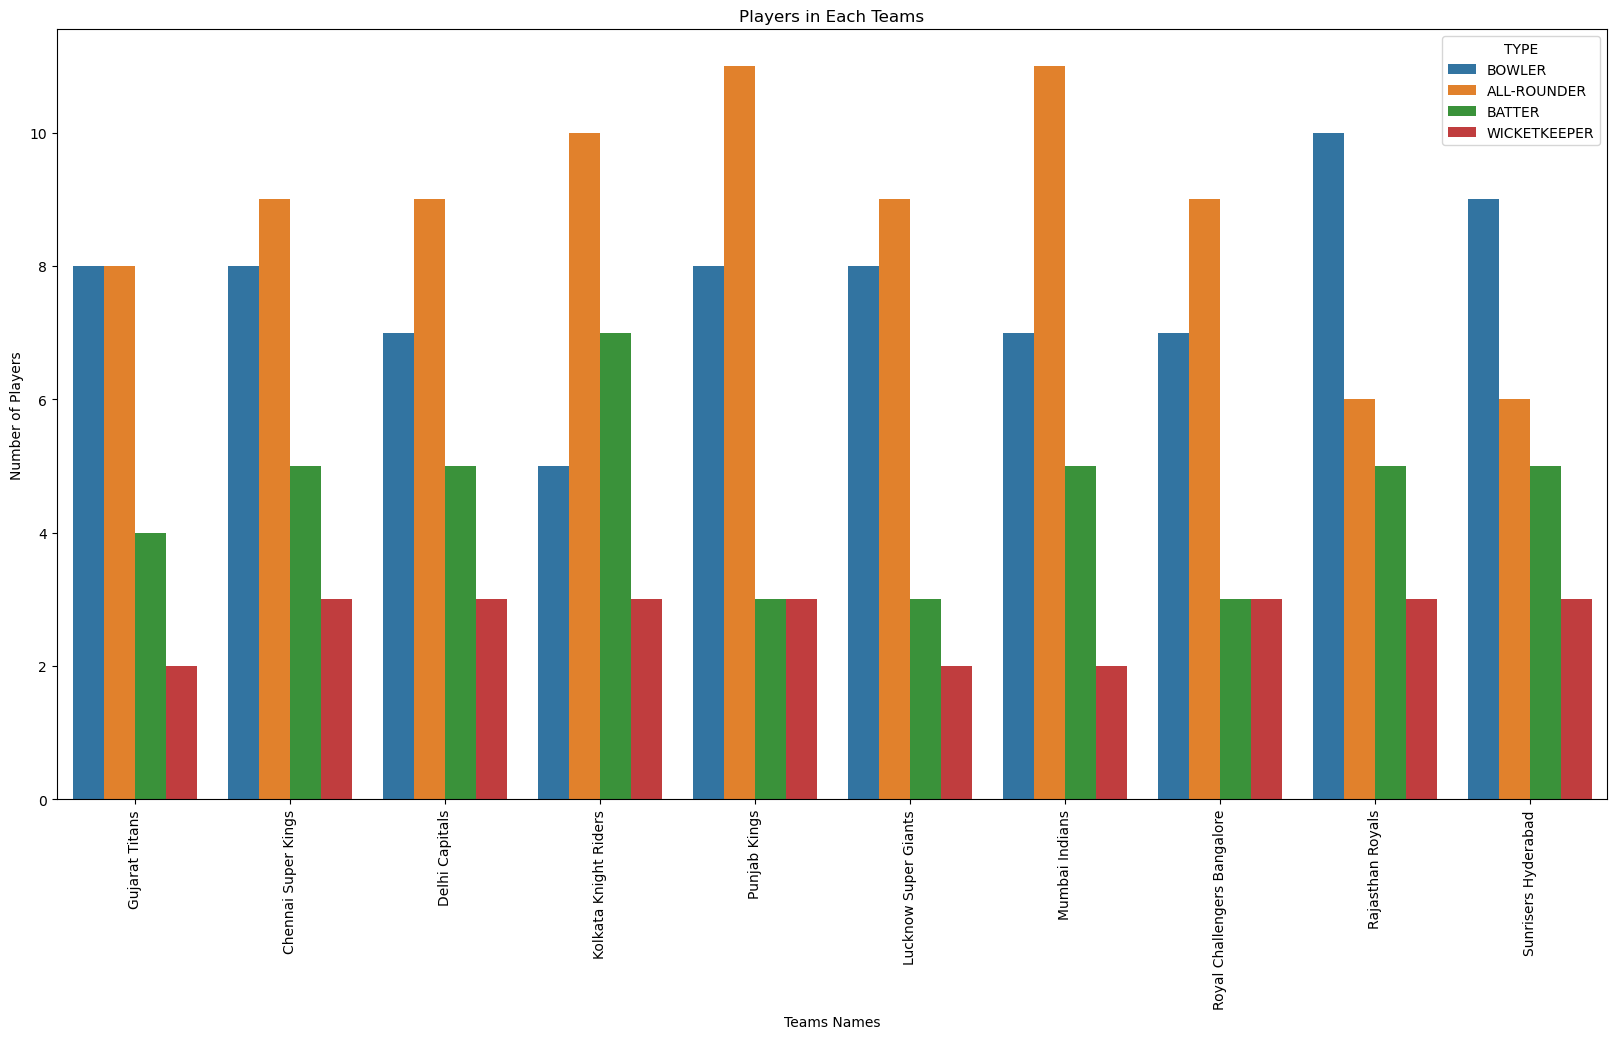

In [74]:
plt.figure(figsize=(20,10))
fig=sns.countplot(ipl[ipl['Team']!='Unsold']['Team'],hue=ipl['TYPE'])
plt.title('Players in Each Teams')
plt.xlabel('Teams Names')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.show()

In [75]:
ipl[ipl['retention']=='From Auction'].groupby(['Team'])['COST IN ₹ (CR.)'].max()[:-1].sort_values(ascending=False)

Team
Mumbai Indians                 15.25
Chennai Super Kings            14.00
Kolkata Knight Riders          12.25
Punjab Kings                   11.50
Delhi Capitals                 10.75
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Gujarat Titans                 10.00
Lucknow Super Giants           10.00
Rajasthan Royals               10.00
Name: COST IN ₹ (CR.), dtype: float64

In [78]:
ipl[ipl['retention']=='Retained'].sort_values(by='COST IN ₹ (CR.)',ascending=False).head(1)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,sold,Retained,Retained,0


In [82]:
ipl[(ipl['retention']=='From Auction') & (ipl['TYPE']=='ALL ROUNDER')].sort_values(by='COST IN ₹ (CR.)', ascending =False)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price


In [85]:
ipl=ipl.rename(columns={'2021 Squad':'Previous Team'})

In [86]:
ipl

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),Previous Team,Team,status,retention,base_price_unit,base_price
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,Pick,Draft
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,Pick,Draft
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,From Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,From Auction,Lakh,40
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,Pick,Draft
...,...,...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction,Lakh,20
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction,Lakh,20
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction,Lakh,20
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold,From Auction,Lakh,20
